**Rules for the code:**

- Include all the code you used for your report in this file. The code for any section in the report should go under the same section in this file.
- Any missing code will result in -20% from its corresponding section in the report.
- Any irrelevant code will result in -20% from its corresponding section in the report.
- Make sure that you run your code before rendering, so all the necessary visual/numeric outputs are visible.
- Any code that is not properly run or throws errors will be considered missing/irrelevant.

## 3) Data

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## 5) Data Cleaning 

Each team member should describe **(no code or code output here)** the following aspects about the data "quality" regarding their analysis:

- How many missing values are there in the variables used for the analysis?
- How are the missing values imputed for each variable? Why that method? (Your reasoning should make sense.)
- Are there any outliers present in the numeric variables? If yes, how many?
- Did you keep or exclude the outliers? Why or why not?
- How many categories are there in the categorical variables?
- Are there categories that are not useful; e.g. a category that has just a few observations, a category that is irrelevant for the analysis, etc.? How do you handle these categories?
- Are there any incorrect values; e.g. a negative age, zero weight, etc., in the variables used for the analysis? If yes, how do you handle those values?

If there is anything you would like to add about cleaning your dataset that is not covered above, feel free to add it to this section.

**(2 points - Graded Individually)**

### a) Cleaning 1
*By Kenneth Cao*

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('StudentPerformanceFactors.csv')

# Only using relevant data columns

status_df = df[['Parental_Involvement', 'Family_Income', 'Parental_Education_Level', 'Exam_Score', 'Motivation_Level']]

# Checking for missing values

print(status_df.isnull().sum())

# Checking whether to include outliers or not (seeing how many outliers):

q1 = np.percentile(status_df['Exam_Score'], 25)
q3 = np.percentile(status_df['Exam_Score'], 75)
iqr = q3 - q1
lower_fence = q1 - 1.5*iqr
upper_fence = q3 + 1.5*iqr

print((len(status_df[status_df['Exam_Score'] > upper_fence]) + len(status_df[status_df['Exam_Score'] < lower_fence])))

# Checking the number of categories

print(status_df.nunique())

# Checking incorrect values

print(status_df['Exam_Score'].min())
print(status_df['Exam_Score'].max())
print(len(status_df[status_df['Exam_Score'] == status_df['Exam_Score'].max()]))

# Doing ordinal encoding to change the categorical variables into numeric

from sklearn.preprocessing import OrdinalEncoder

ordinal_features = ['Parental_Involvement', 'Family_Income', 'Parental_Education_Level', 'Motivation_Level']
encoder = OrdinalEncoder()

status_df[ordinal_features] = encoder.fit_transform(status_df[ordinal_features])

# Using a function to impute

x = status_df['Exam_Score']
y = status_df['Parental_Education_Level']

idx_nonmissing = np.isfinite(x) & np.isfinite(y) 

x_full = x[idx_nonmissing]
y_full = y[idx_nonmissing]

slope_int = np.polyfit(x_full, y_full, 1)

f_line = np.poly1d(slope_int)

numeric_status_imputed = status_df.copy()

null_ind_education = status_df.index[status_df['Parental_Education_Level'].isnull()]

numeric_status_imputed.loc[null_ind_education, 'Parental_Education_Level'] = f_line(status_df.loc[null_ind_education, 'Exam_Score'])

# Having the same data frame that's turned back into categorical 

categorical_status_df = numeric_status_imputed.copy()

categorical_status_df[ordinal_features] = encoder.inverse_transform(numeric_status_imputed[ordinal_features])

Parental_Involvement         0
Family_Income                0
Parental_Education_Level    90
Exam_Score                   0
Motivation_Level             0
dtype: int64
104
Parental_Involvement         3
Family_Income                3
Parental_Education_Level     3
Exam_Score                  45
Motivation_Level             3
dtype: int64
55
101
1


/var/folders/y3/1p2dngwn74l8ysmjbcpx1fyr0000gn/T/ipykernel_67378/1197102096.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  status_df[ordinal_features] = encoder.fit_transform(status_df[ordinal_features])


### b) Cleaning 2
*By \<Name of team member>*

### c) Cleaning 3
*By \<Name of team member>*

### d) Cleaning 4
*By \<Name of team member>*

## 6) Data Analysis

### a) Analysis 1
*By Kenneth*

### b) Analysis 2
*By *

### c) Analysis 3: 
*By Kenneth Cao*

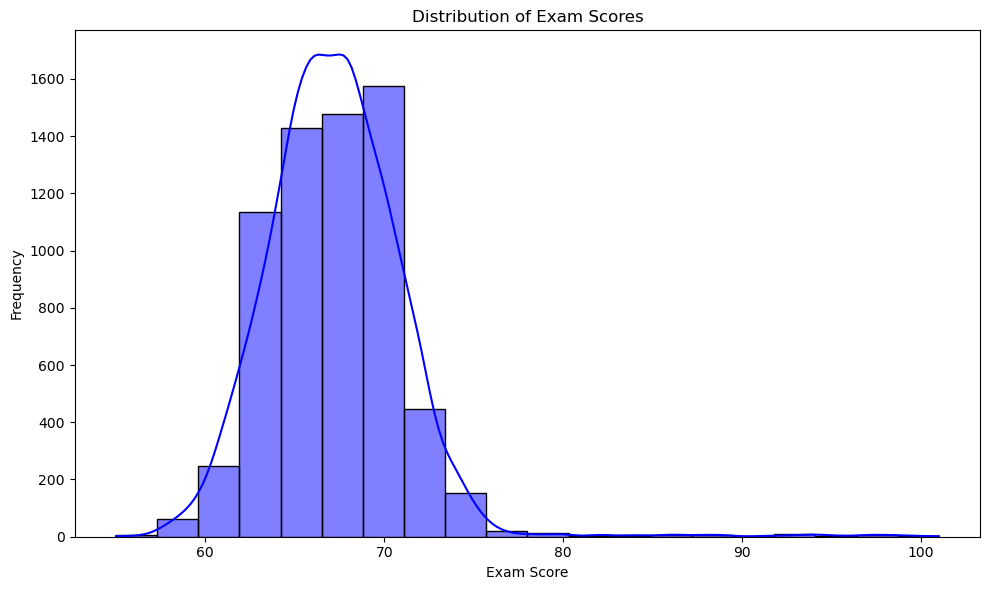

/var/folders/y3/1p2dngwn74l8ysmjbcpx1fyr0000gn/T/ipykernel_67378/821299631.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = categorical_status_df.groupby(['Exam_Score_Quartile', feature]).size().unstack()
/var/folders/y3/1p2dngwn74l8ysmjbcpx1fyr0000gn/T/ipykernel_67378/821299631.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = categorical_status_df.groupby(['Exam_Score_Quartile', feature]).size().unstack()
/var/folders/y3/1p2dngwn74l8ysmjbcpx1fyr0000gn/T/ipykernel_67378/821299631.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a futu

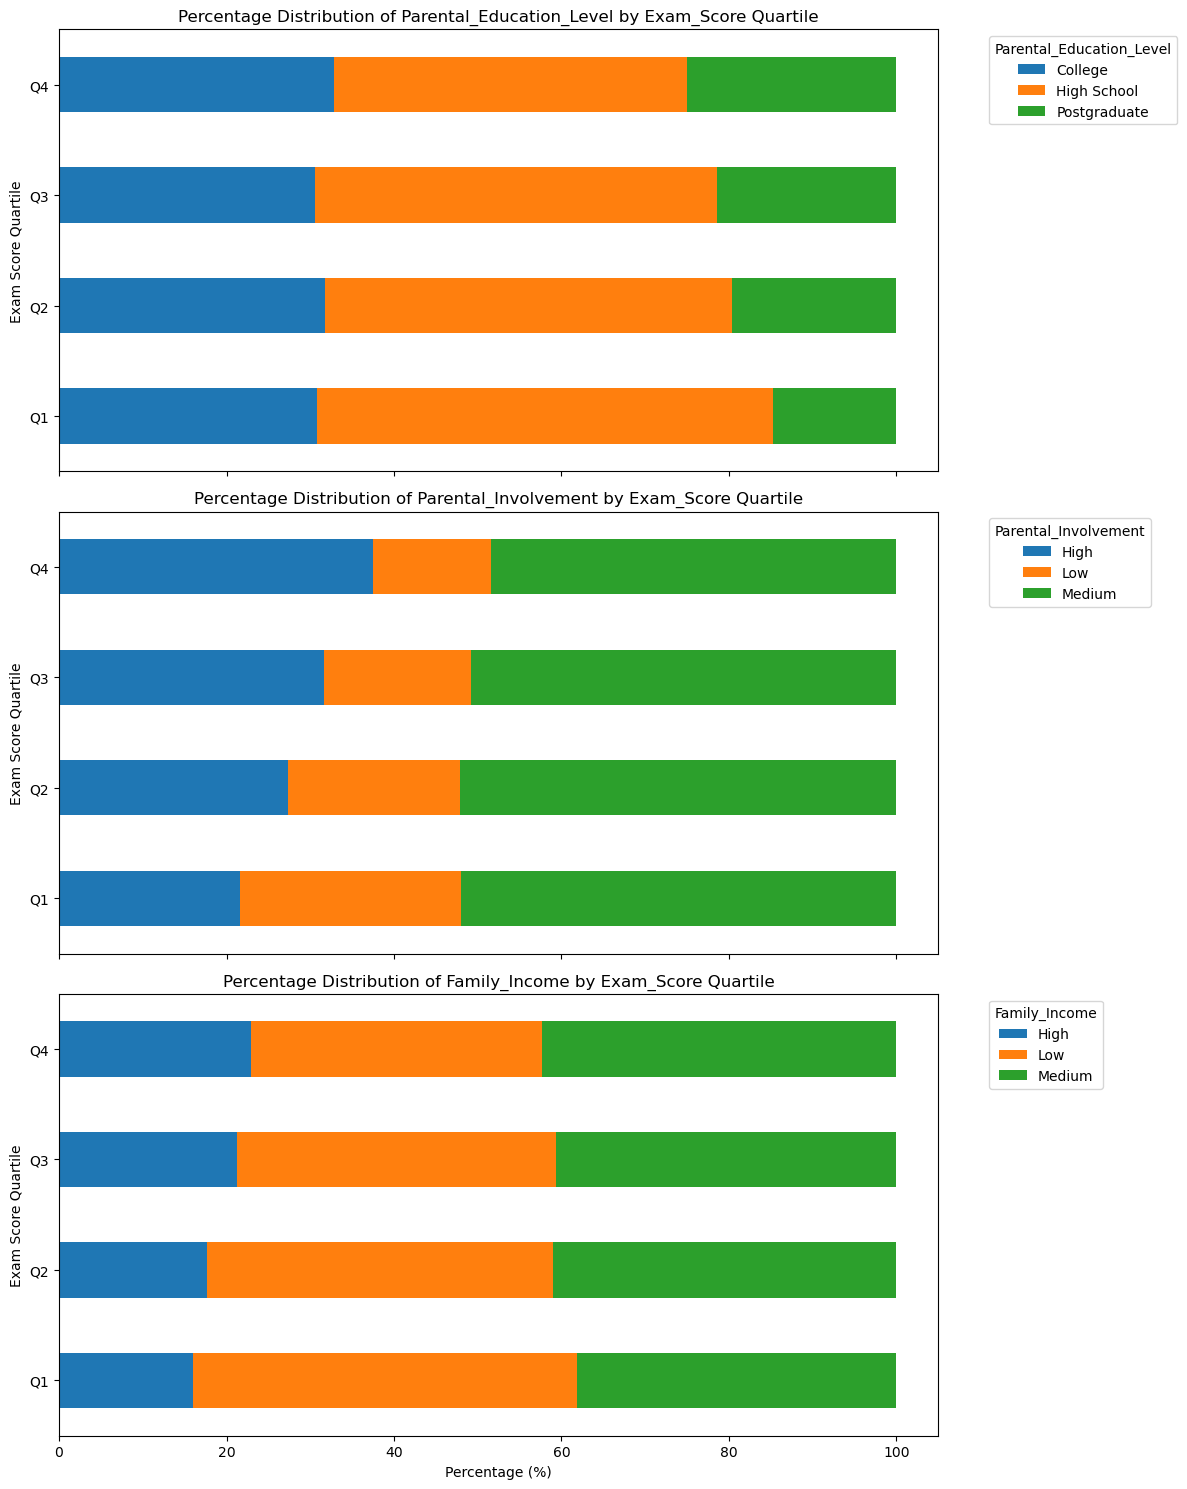

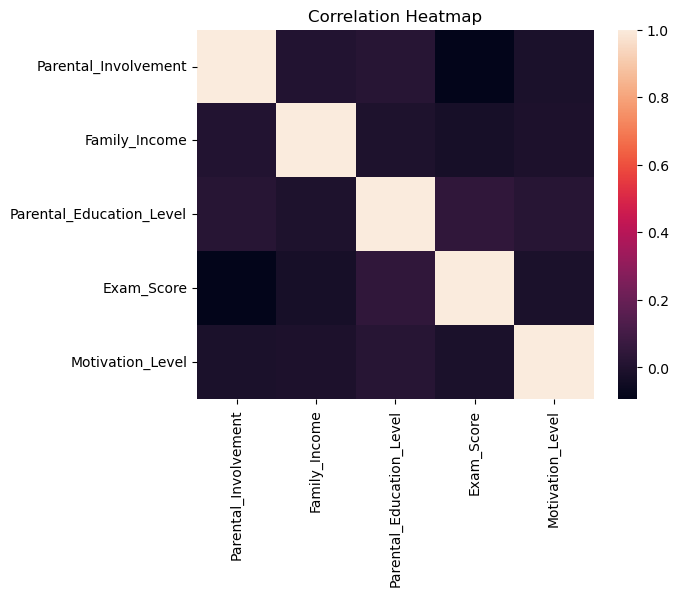

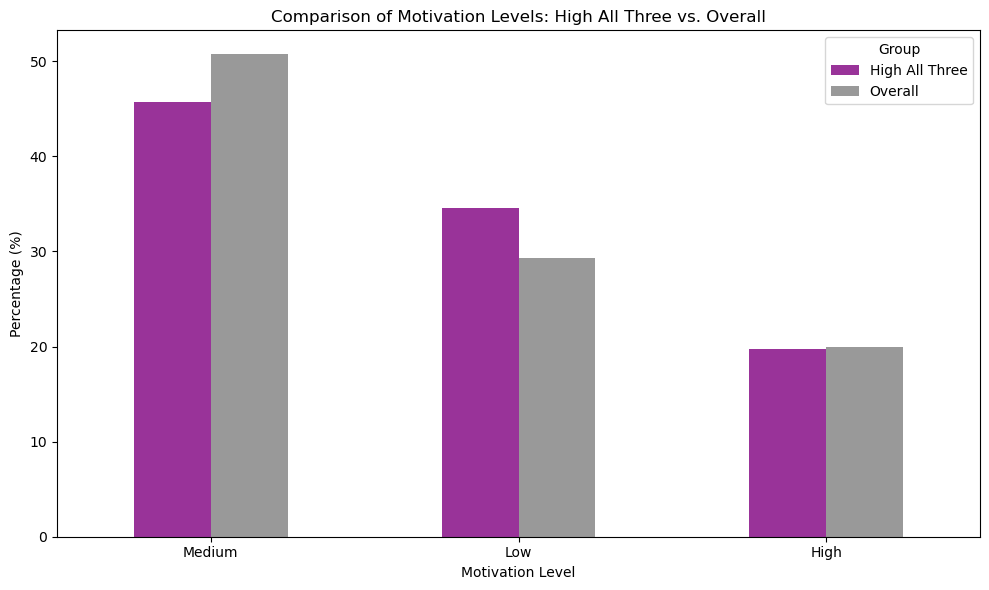

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exam score distribution

plt.figure(figsize=(10, 6))
sns.histplot(categorical_status_df['Exam_Score'], bins=20, kde=True, color='blue')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Creating stacked bar charts

categorical_status_df['Exam_Score_Quartile'] = pd.qcut(
    categorical_status_df['Exam_Score'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

features = ['Parental_Education_Level', 'Parental_Involvement', 'Family_Income']

fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

for i, feature in enumerate(features):
    grouped = categorical_status_df.groupby(['Exam_Score_Quartile', feature]).size().unstack()
    percentages = grouped.div(grouped.sum(axis = 1), axis = 0) * 100

    percentages.plot(kind = 'barh', stacked = True, ax = axes[i])
    axes[i].set_title(f'Percentage Distribution of {feature} by Exam_Score Quartile')
    axes[i].set_ylabel('Exam Score Quartile')
    axes[i].legend(title=feature, bbox_to_anchor=(1.05, 1), loc = 'upper left')

plt.xlabel('Percentage (%)')
plt.tight_layout()
plt.show()

# Creating correlation heatmap

sns.heatmap(numeric_status_imputed.corr(numeric_only = True))
plt.title('Correlation Heatmap')
plt.show()

# Motivation Graph

overall_motivation_distribution = categorical_status_df['Motivation_Level'].value_counts(normalize=True) * 100

high_all_three = categorical_status_df[
    (categorical_status_df['Parental_Education_Level'] == 'Postgraduate') &
    (categorical_status_df['Family_Income'] == 'High') &
    (categorical_status_df['Parental_Involvement'] == 'High')
]

motivation_distribution = high_all_three['Motivation_Level'].value_counts(normalize=True) * 100

comparison_df = pd.DataFrame({
    'High All Three': motivation_distribution,
    'Overall': overall_motivation_distribution
}).fillna(0)

comparison_df.plot(kind='bar', figsize=(10, 6), alpha=0.8, color=['purple', 'gray'])
plt.title('Comparison of Motivation Levels: High All Three vs. Overall')
plt.xlabel('Motivation Level')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Group')
plt.tight_layout()
plt.show()

### d) Analysis 4
*By \<Name of team member>*